# Objective
This project is type analyze the factors Affecting the scoring of the students. In the the scores were taken as the depended variable and the remaining factors were taken as the independent and the analysis was performed each and very factor and the insights were drawn. 

# Steps
1. Dataset was downloaded for the kaggle with the kaggle API usage.
2. Correct the Column names.
3. Drop Unnamaed Column.
4. Change weekly_study_hours column
5. Analysis
    1. Gender Destribution
    2. Impact by Parent Eduction
    3. Impact by Parent Marital Status
    4. Impact by Test preparation
    5. Impact by Weekly Study Hours
    6. Impact by sport practice
    7. Impact by Transport means
    8. Impact by no of sibilings
    9. Impact of lunch type
    10. impact of first child or not
6. Distribution of the ethnic groups.
7. Insights

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import re

In [16]:
#!kaggle datasets download desalegngeb/students-exam-scores -f Expanded_data_with_more_features.csv

In [17]:
#as it is downloaded in the zip format we can unzip by using the below commands
#import zipfile
#zip_ref = zipfile.ZipFile('Expanded_data_with_more_features.csv.zip') 
#zip_ref.extractall() # extract file to dir
#zip_ref.close() # close file

In [18]:
st = pd.read_csv('Expanded_data_with_more_features.csv')

In [19]:
st.head()

Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  
1         5 - 10         69            90            88  
2            < 5         87            93            91  
3         5 - 10         45            56            42  
4         5 - 10         76            78            75

# Correct the Column names 

In [36]:
#function to add _ after the first instance in the column names
def add_space_before_capital(s):
    return re.sub(r'(?<=[A-Za-z])([A-Z])', r'_\1', s)

In [37]:
st.columns = [add_space_before_capital(col) for col in st.columns]

In [38]:
st.columns

Index(['Unnamed: 0', 'Gender', 'Ethnic_Group', 'Parent_Educ', 'Lunch_Type',
       'Test_Prep', 'Parent_Marital_Status', 'Practice_Sport',
       'Is_First_Child', 'Nr_Siblings', 'Transport_Means', 'Wkly_Study_Hours',
       'Math_Score', 'Reading_Score', 'Writing_Score'],
      dtype='object')

In [39]:
#rename columns names ..make them lower case 
st.columns = st.columns.str.lower()

In [41]:
st.columns

Index(['unnamed: 0', 'gender', 'ethnic_group', 'parent_educ', 'lunch_type',
       'test_prep', 'parent_marital_status', 'practice_sport',
       'is_first_child', 'nr_siblings', 'transport_means', 'wkly_study_hours',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [42]:
st.describe()

unnamed: 0   nr_siblings    math_score  reading_score  writing_score
count  30641.000000  29069.000000  30641.000000   30641.000000   30641.000000
mean     499.556607      2.145894     66.558402      69.377533      68.418622
std      288.747894      1.458242     15.361616      14.758952      15.443525
min        0.000000      0.000000      0.000000      10.000000       4.000000
25%      249.000000      1.000000     56.000000      59.000000      58.000000
50%      500.000000      2.000000     67.000000      70.000000      69.000000
75%      750.000000      3.000000     78.000000      80.000000      79.000000
max      999.000000      7.000000    100.000000     100.000000     100.000000

In [43]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed: 0             30641 non-null  int64  
 1   gender                 30641 non-null  object 
 2   ethnic_group           28801 non-null  object 
 3   parent_educ            28796 non-null  object 
 4   lunch_type             30641 non-null  object 
 5   test_prep              28811 non-null  object 
 6   parent_marital_status  29451 non-null  object 
 7   practice_sport         30010 non-null  object 
 8   is_first_child         29737 non-null  object 
 9   nr_siblings            29069 non-null  float64
 10  transport_means        27507 non-null  object 
 11  wkly_study_hours       29686 non-null  object 
 12  math_score             30641 non-null  int64  
 13  reading_score          30641 non-null  int64  
 14  writing_score          30641 non-null  int64  
dtypes:

In [44]:
st.isnull().sum()

unnamed: 0                  0
gender                      0
ethnic_group             1840
parent_educ              1845
lunch_type                  0
test_prep                1830
parent_marital_status    1190
practice_sport            631
is_first_child            904
nr_siblings              1572
transport_means          3134
wkly_study_hours          955
math_score                  0
reading_score               0
writing_score               0
dtype: int64

As the score columns are not having any null values there is no need to remove the null values.

# Drop Unnamaed Column

In [46]:
st = st.drop('unnamed: 0', axis =1)
st.head()

gender ethnic_group         parent_educ    lunch_type test_prep  \
0  female          NaN   bachelor's degree      standard      none   
1  female      group C        some college      standard       NaN   
2  female      group B     master's degree      standard      none   
3    male      group A  associate's degree  free/reduced      none   
4    male      group C        some college      standard      none   

  parent_marital_status practice_sport is_first_child  nr_siblings  \
0               married      regularly            yes          3.0   
1               married      sometimes            yes          0.0   
2                single      sometimes            yes          4.0   
3               married          never             no          1.0   
4               married      sometimes            yes          0.0   

  transport_means wkly_study_hours  math_score  reading_score  writing_score  
0      school_bus              < 5          71             71             74  
1             NaN           5 - 10          69             90             88  
2      school_bus              < 5          87             93             91  
3             NaN           5 - 10          45             56             42  
4      school_bus           5 - 10          76             78             75

# Change wkly_study_hours column

In [47]:
st['wkly_study_hours'].value_counts()

wkly_study_hours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64

as there is no anamoly their no need to change the wkly hours

# Analysis

### Gender Destribution ###

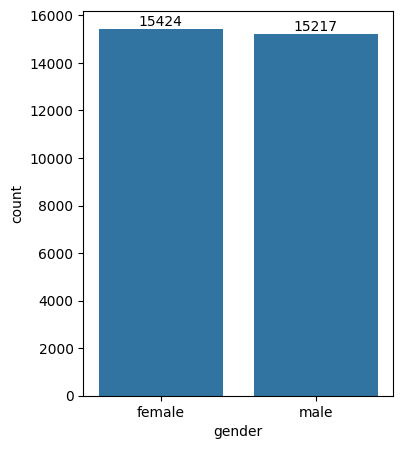

In [51]:
plt.figure(figsize= (4,5))
ax = sns.countplot(x= 'gender', data = st)
ax.bar_label(ax.containers[0])
plt.savefig('gender distribution.jpg')
plt.show()

From the a bove data we can say that the number of females werer more when compared to males in the data set.

In [52]:
st.columns

Index(['gender', 'ethnic_group', 'parent_educ', 'lunch_type', 'test_prep',
       'parent_marital_status', 'practice_sport', 'is_first_child',
       'nr_siblings', 'transport_means', 'wkly_study_hours', 'math_score',
       'reading_score', 'writing_score'],
      dtype='object')

# Impact by Parent Eduction

In [54]:
gb = st.groupby('parent_educ').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb

math_score  reading_score  writing_score
parent_educ                                                 
associate's degree   68.365586      71.124324      70.299099
bachelor's degree    70.466627      73.062020      73.331069
high school          64.435731      67.213997      65.421136
master's degree      72.336134      75.832921      76.356896
some college         66.390472      69.179708      68.501432
some high school     62.584013      65.510785      63.632409

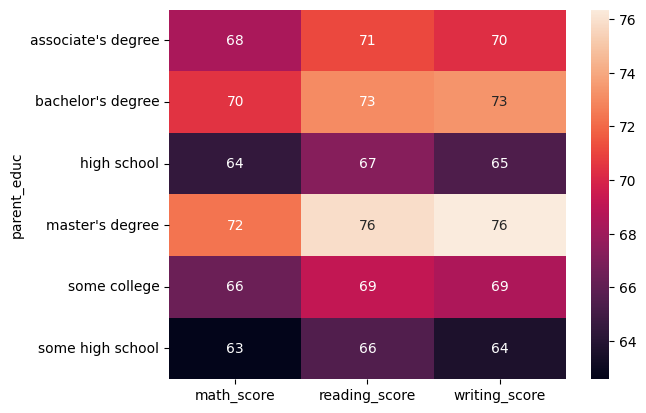

In [56]:
sns.heatmap(gb, annot= True)
plt.show()

From the a bove chart we can conclude that the eduction of the parents has a good impact on the student scores.

# Impact by Parent Marital Status

In [59]:
gb1 = st.groupby('parent_marital_status').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb1

math_score  reading_score  writing_score
parent_marital_status                                          
divorced                66.691197      69.655011      68.799146
married                 66.657326      69.389575      68.420981
single                  66.165704      69.157250      68.174440
widowed                 67.368866      69.651438      68.563452

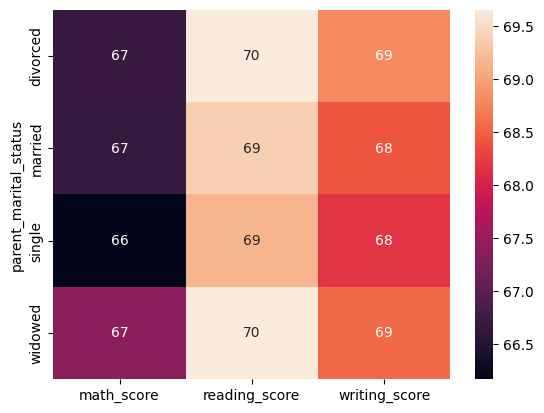

In [60]:
sns.heatmap(gb1, annot= True)
plt.show()

So from the above chart we can say parent_marital_status does not have any impact on student scores


In [75]:
st.columns

Index(['gender', 'ethnic_group', 'parent_educ', 'lunch_type', 'test_prep',
       'parent_marital_status', 'practice_sport', 'is_first_child',
       'nr_siblings', 'transport_means', 'wkly_study_hours', 'math_score',
       'reading_score', 'writing_score'],
      dtype='object')

# Impact by Test preparation

In [76]:
gb2 = st.groupby('test_prep').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb2

math_score  reading_score  writing_score
test_prep                                          
completed    69.54666      73.732998      74.703265
none         64.94877      67.051071      65.092756

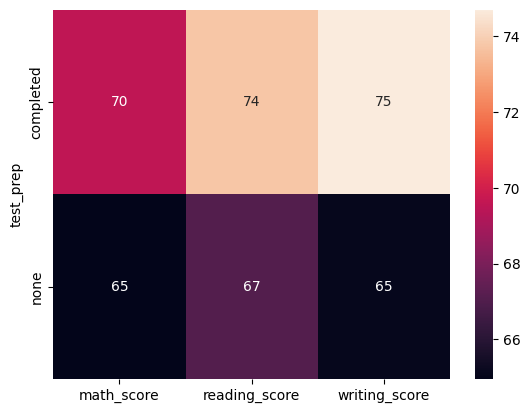

In [77]:
sns.heatmap(gb2, annot= True)
plt.show()

The students who were prepared for the exams were scored higher than the students who are not.

# Impact by sport practice

In [78]:
gb3 = st.groupby('practice_sport').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb3

math_score  reading_score  writing_score
practice_sport                                          
never            64.171079      68.337662      66.522727
regularly        67.839155      69.943019      69.604003
sometimes        66.274831      69.241307      68.072438

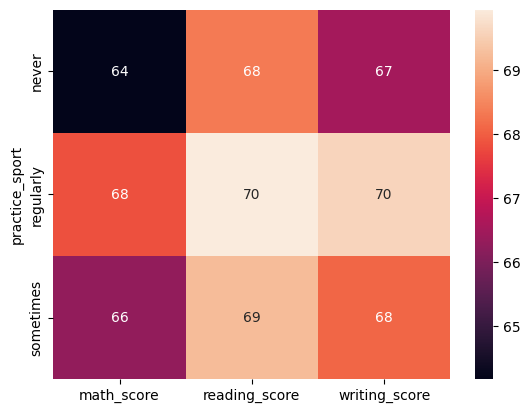

In [79]:
sns.heatmap(gb3, annot= True)
plt.show()

This shows that the students who practice sports daily were the ones with the highest avg scores.

# Impact by weekly study hours

In [80]:
gb4 = st.groupby('wkly_study_hours').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb4

math_score  reading_score  writing_score
wkly_study_hours                                          
5 - 10             66.870491      69.660532      68.636280
< 5                64.580359      68.176135      67.090192
> 10               68.696655      70.365436      69.777778

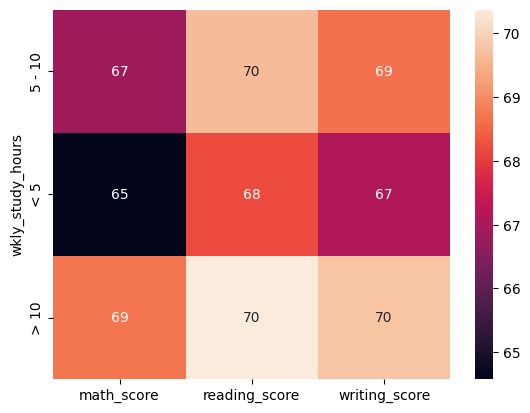

In [81]:
sns.heatmap(gb4, annot= True)
plt.show()

This shows that the number of weekly study hours does have the impact on the scores of the students were the > 10 hours had highest average scores in the subjects

# Impact by Transport means

In [119]:
gb5 = st.groupby('transport_means').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb5

math_score  reading_score  writing_score
transport_means                                          
private           66.511354      69.472364      68.509593
school_bus        66.674636      69.446206      68.492351

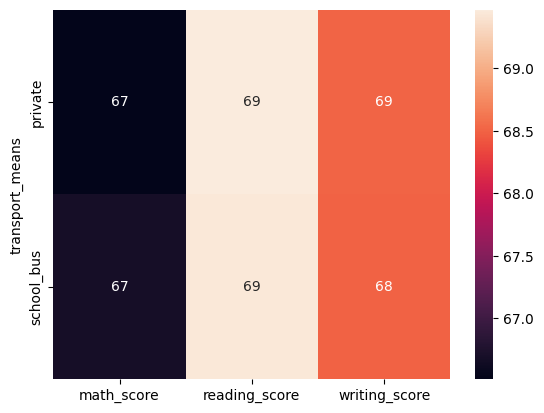

In [120]:
sns.heatmap(gb5, annot= True)
plt.show()

this shows that the mode of transport does not impact the scores

# Impact by no of sibilings

In [103]:
gb6 = st.groupby('nr_siblings').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb6

math_score  reading_score  writing_score
nr_siblings                                          
0.0           66.819449      69.547812      68.746515
1.0           66.473896      69.259097      68.245345
2.0           66.554934      69.472018      68.522533
3.0           66.719092      69.488159      68.650498
4.0           66.245495      69.144169      68.073444
5.0           66.630303      69.453788      68.282576
6.0           65.917219      68.801325      67.860927
7.0           67.615120      69.828179      68.986254

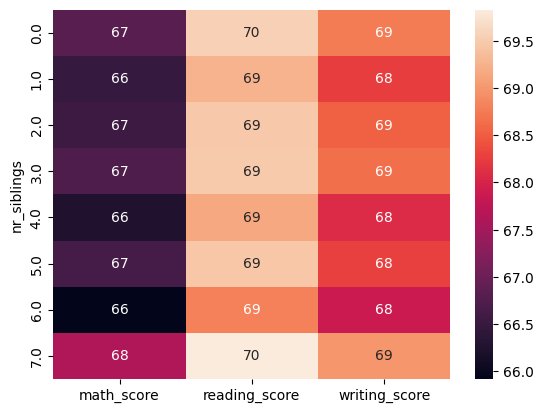

In [104]:
sns.heatmap(gb6, annot= True)
plt.show()

These show that the sibilings number does not impact the scores.

# Impact of lunch type

In [112]:
gb7 = st.groupby('lunch_type').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb7

math_score  reading_score  writing_score
lunch_type                                            
free/reduced   58.862332      64.189735      62.650522
standard       70.709370      72.175634      71.529716

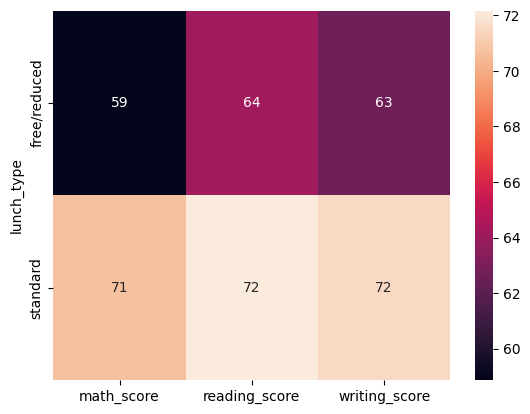

In [115]:
sns.heatmap(gb7, annot= True)
plt.show()

Their is a clear difference in scores the students who get the standard food and who are not and the difference is significant.

# impact of first child or not

In [113]:
gb8 = st.groupby('is_first_child').agg({"math_score":'mean',"reading_score":'mean',"writing_score":'mean'})
gb8

math_score  reading_score  writing_score
is_first_child                                          
no               66.246832      69.132614      68.210887
yes              66.740646      69.542553      68.558484

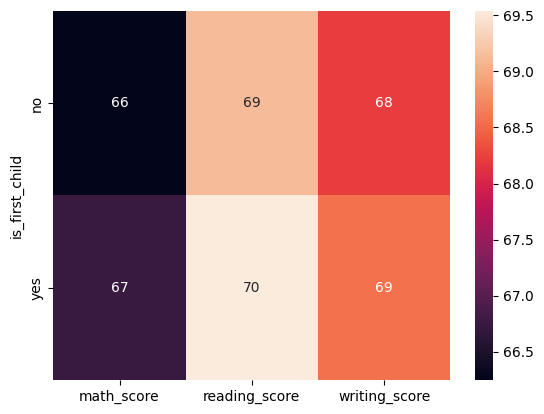

In [114]:
sns.heatmap(gb8, annot= True)
plt.show()

No impact is their in the score by whether he is a first child or not

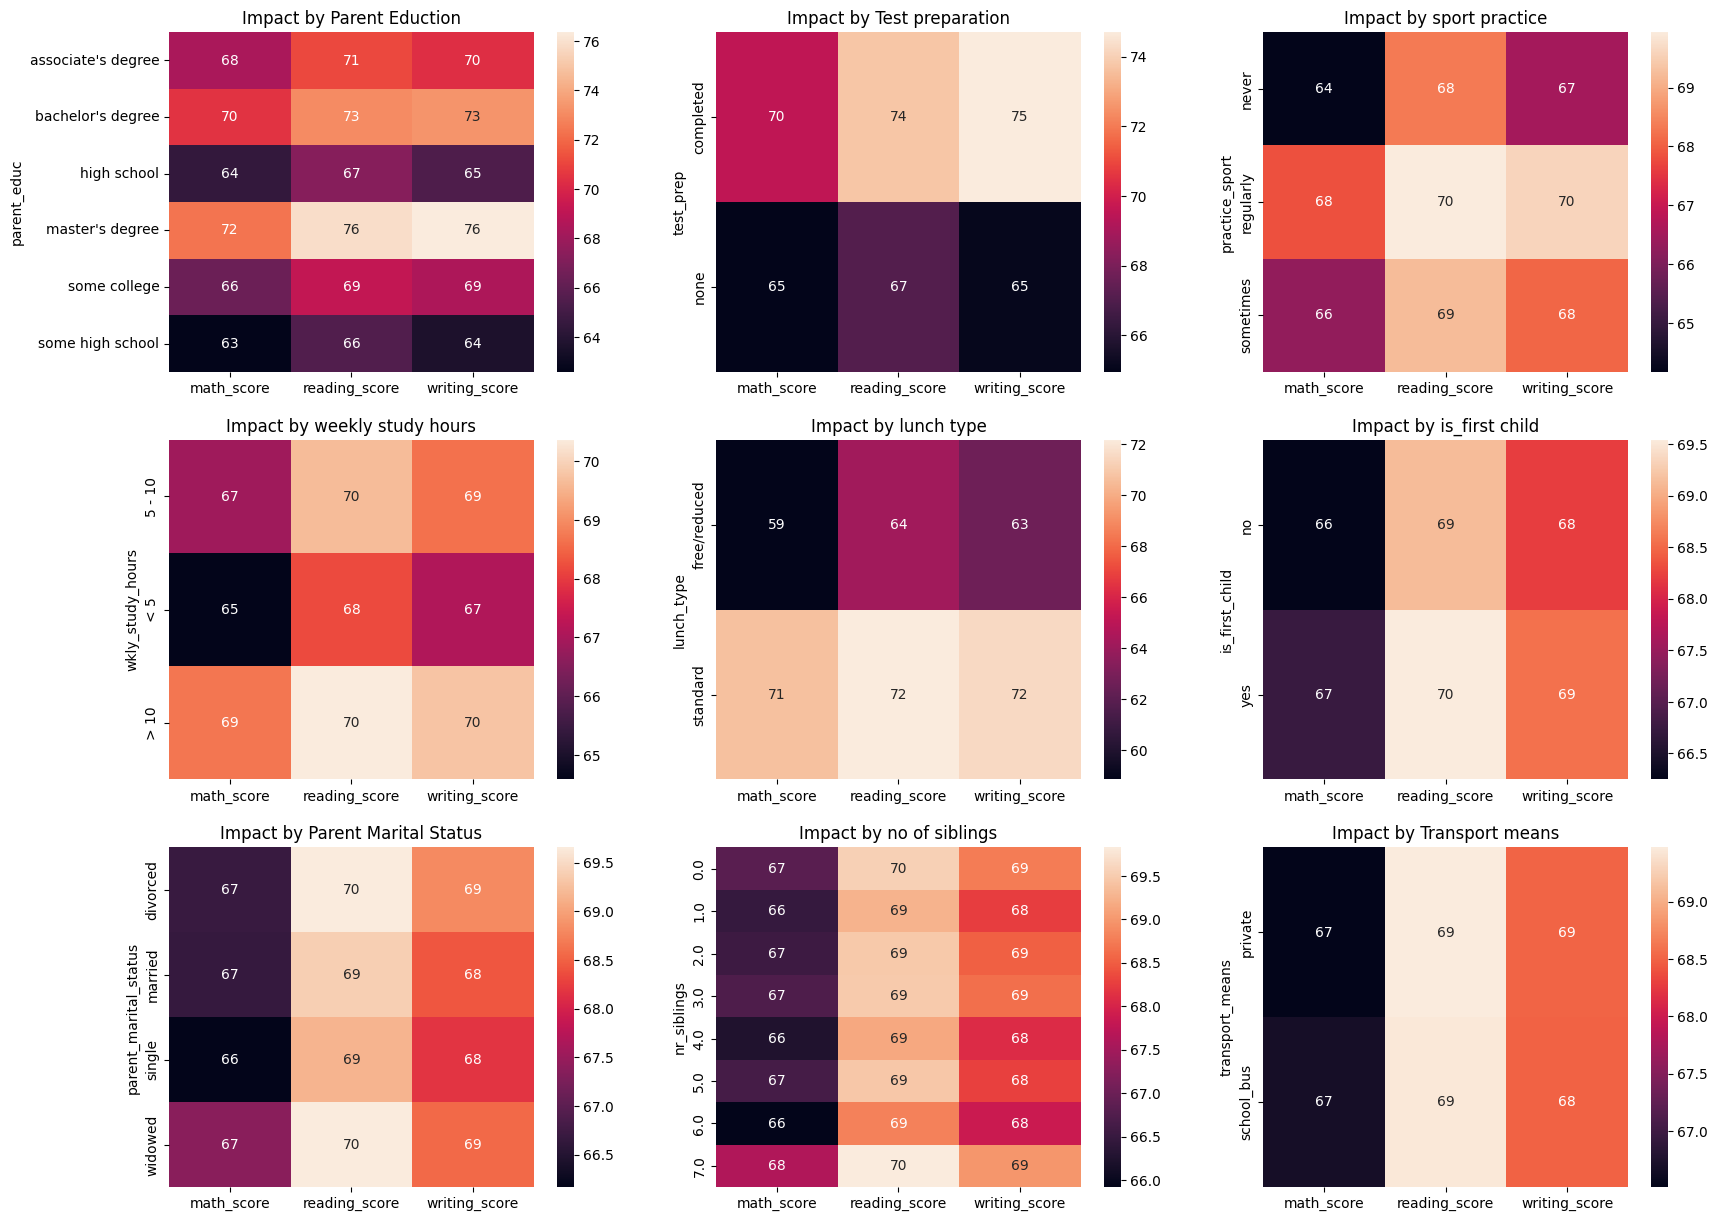

In [121]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,7)
sns.heatmap(gb1, annot= True)
plt.title("Impact by Parent Marital Status")


plt.subplot(3,3,2)
sns.heatmap(gb2, annot= True)
plt.title("Impact by Test preparation")

plt.subplot(3,3,3)
sns.heatmap(gb3, annot= True)
plt.title("Impact by sport practice")

plt.subplot(3,3,4)
sns.heatmap(gb4, annot= True)
plt.title("Impact by weekly study hours")

plt.subplot(3,3,9)
sns.heatmap(gb5, annot= True)
plt.title("Impact by Transport means")

plt.subplot(3,3,1)
sns.heatmap(gb, annot= True)
plt.title("Impact by Parent Eduction")

plt.subplot(3,3,8)
sns.heatmap(gb6, annot= True)
plt.title("Impact by no of siblings")

plt.subplot(3,3,5)
sns.heatmap(gb7, annot= True)
plt.title("Impact by lunch type")

plt.subplot(3,3,6)
sns.heatmap(gb8, annot= True)
plt.title("Impact by is_first child")

plt.savefig("Relationship_representation.jpg")


# Insights
1. From the a bove chart we can conclude that the eduction of the parents has a good impact on the student scores.
2. So from the above chart we can say parent_marital_status does not have any impact on student scores
3. The students who were prepared for the exams were scored higher than the students who are not.
4. This shows that the students who practice sports daily were the ones with the highest avg scores.
5. This shows that the number of weekly study hours does have the impact on the scores of the students were the > 10 hours had highest average scores in the subjects.
6. this shows that the mode of transport does not impact the scores.
7. These show that the sibilings number does not impact the scores.
8. Their is a clear difference in scores the students who get the standard food and who are not and the difference is significant.
9. No impact is their in the score by whether he is a first child or not.

# This is further reprented by the pair plot

In [139]:
sc = st.drop(['nr_siblings'], axis = 1)

In [133]:
st.columns

Index(['gender', 'ethnic_group', 'parent_educ', 'lunch_type', 'test_prep',
       'parent_marital_status', 'practice_sport', 'is_first_child',
       'nr_siblings', 'transport_means', 'wkly_study_hours', 'math_score',
       'reading_score', 'writing_score'],
      dtype='object')

In [140]:
sc.columns

Index(['gender', 'ethnic_group', 'parent_educ', 'lunch_type', 'test_prep',
       'parent_marital_status', 'practice_sport', 'is_first_child',
       'transport_means', 'wkly_study_hours', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

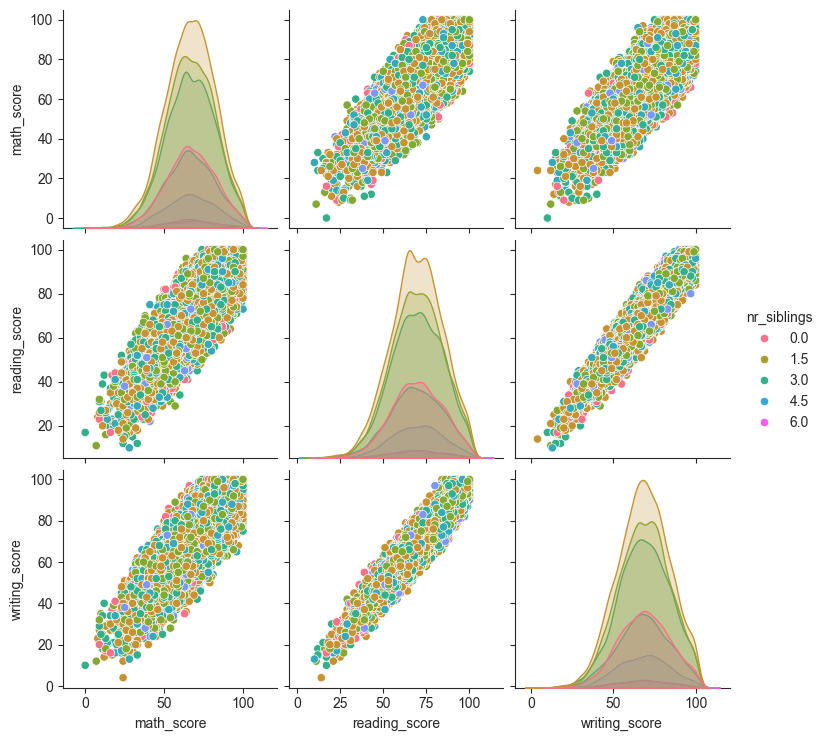

In [135]:
sns.set_style('ticks')
sns.pairplot(st, hue = 'nr_siblings', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

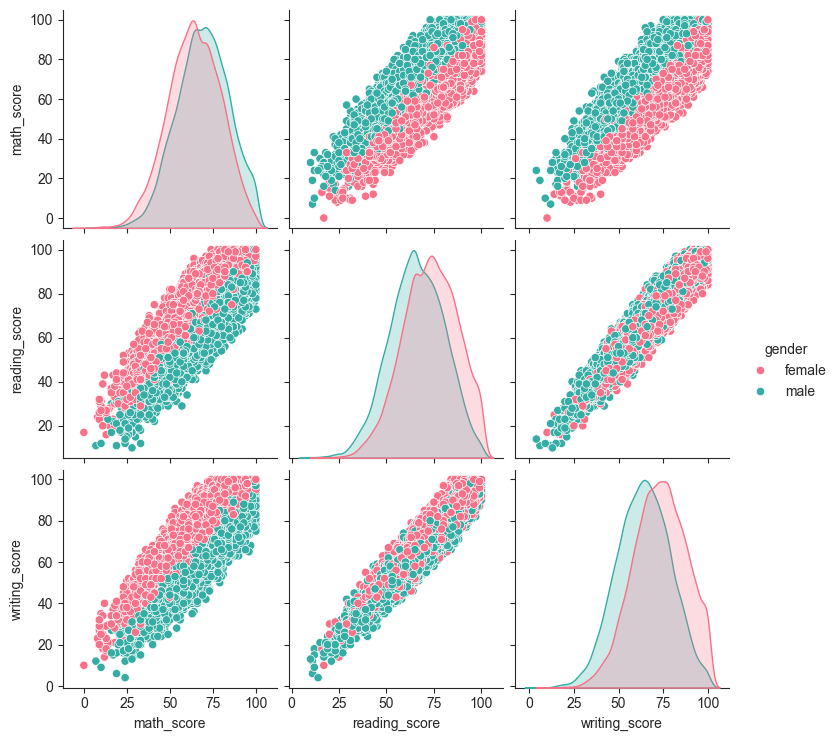

In [142]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'gender', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

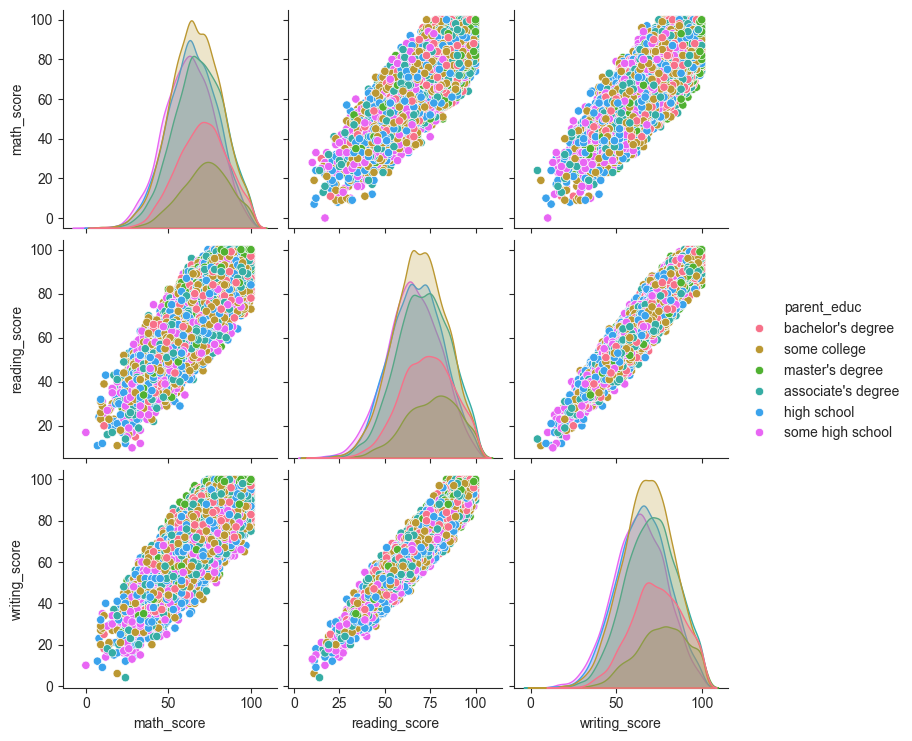

In [144]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'parent_educ', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

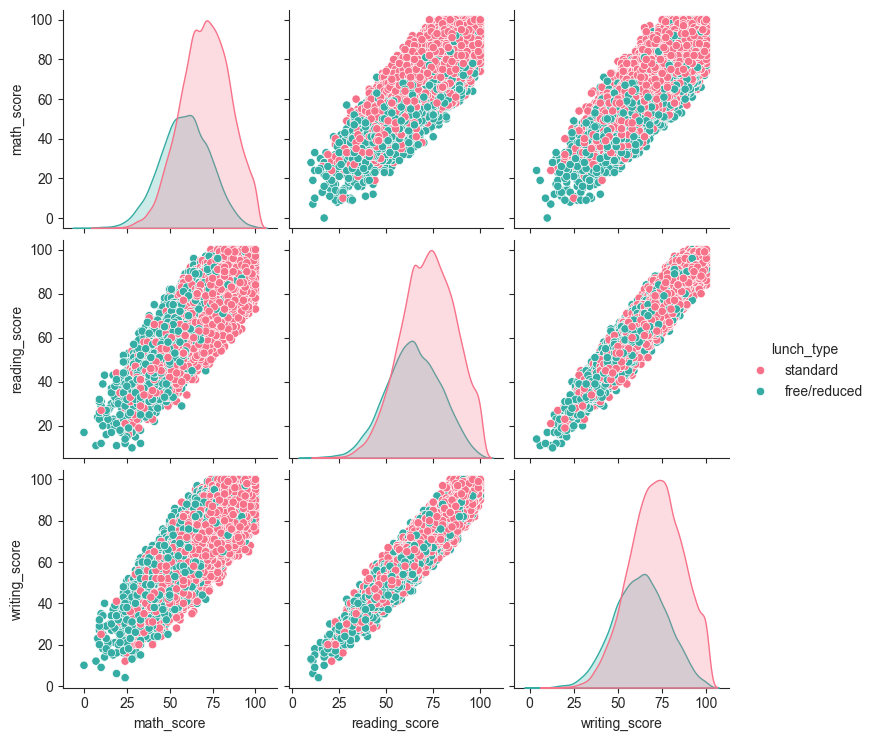

In [148]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'lunch_type', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

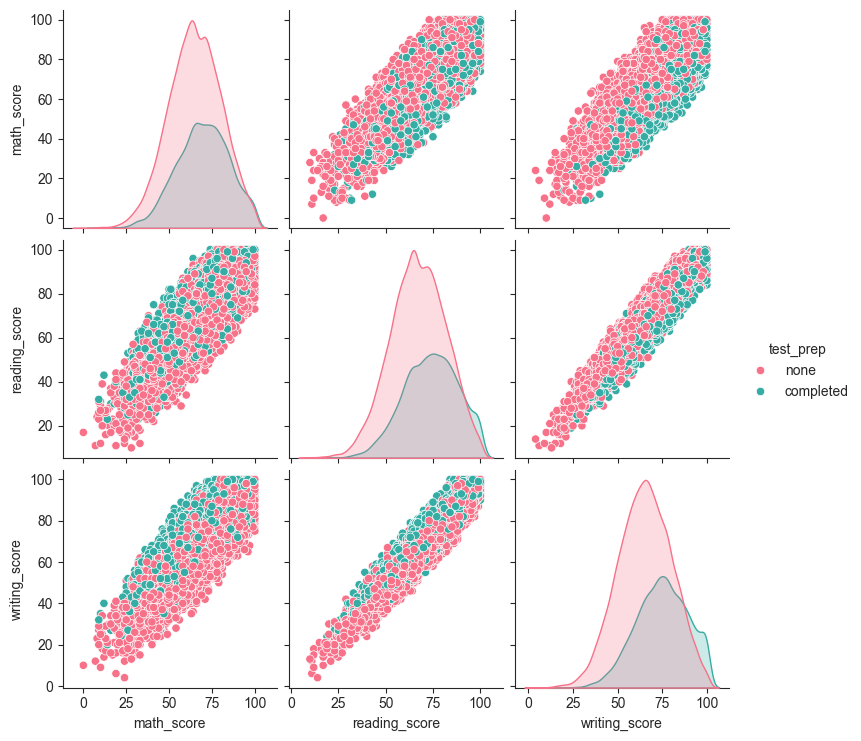

In [149]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'test_prep', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

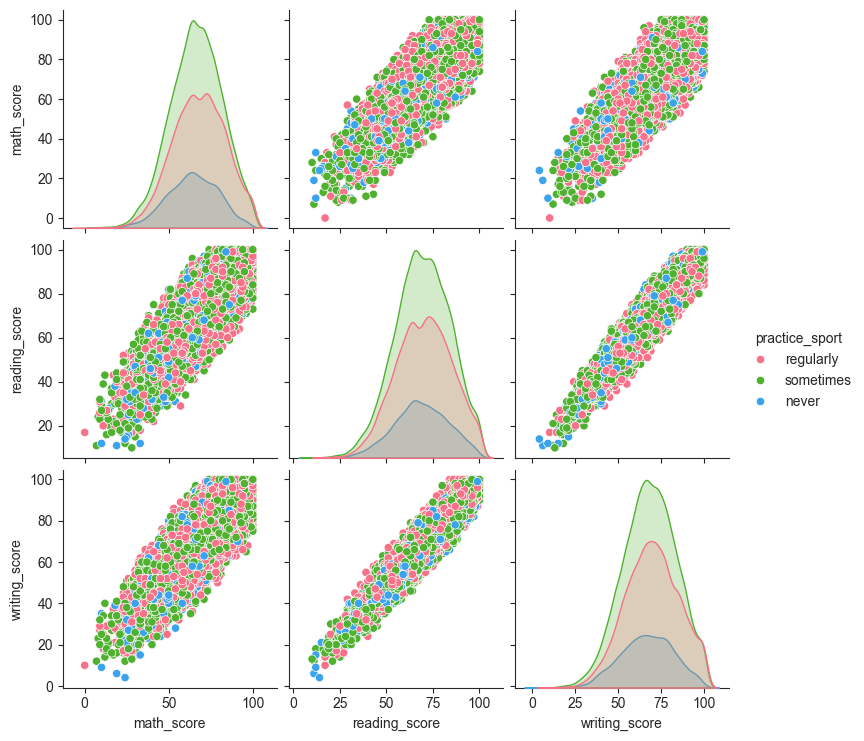

In [150]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'practice_sport', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

Text(0.5, 1.0, 'wkly_study_hours')

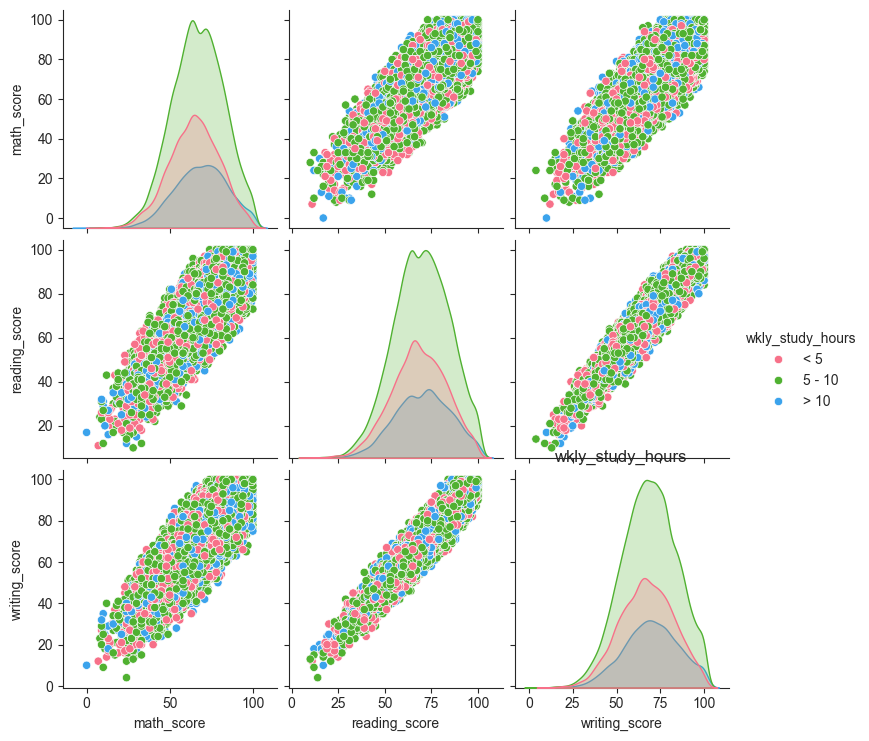

In [153]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'wkly_study_hours', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

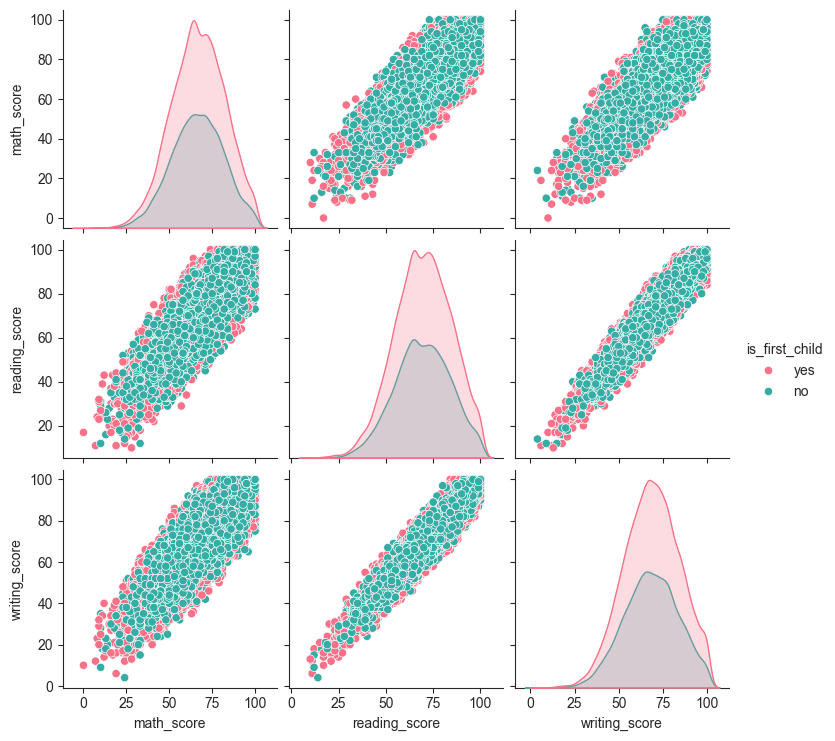

In [147]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'is_first_child', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

<Axes: xlabel='writing_score'>

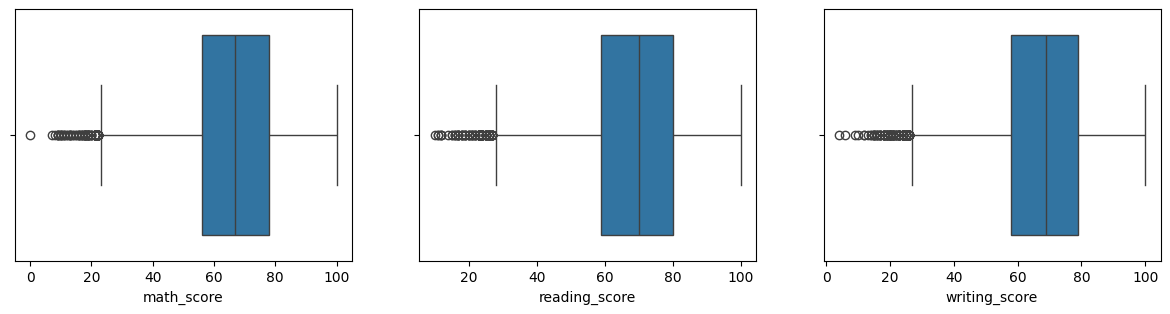

In [64]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data = st, x = 'math_score')

plt.subplot(4,4,2)
sns.boxplot(data = st, x = 'reading_score')

plt.subplot(4,4,3)
sns.boxplot(data = st, x = 'writing_score')


This shows that the students maths scores are low when comapred with the other two.

# Distribution of Ethnic groups

In [65]:
st['ethnic_group'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [67]:
groupA = st.loc[(st['ethnic_group'] == "group A")].count()
groupB = st.loc[(st['ethnic_group'] == "group B")].count()
groupC = st.loc[(st['ethnic_group'] == "group C")].count()
groupD = st.loc[(st['ethnic_group'] == "group D")].count()
groupE = st.loc[(st['ethnic_group'] == "group E")].count()

mtlist = [groupA['ethnic_group'],groupB['ethnic_group'],groupC['ethnic_group'],
          groupD['ethnic_group'],groupE['ethnic_group']]


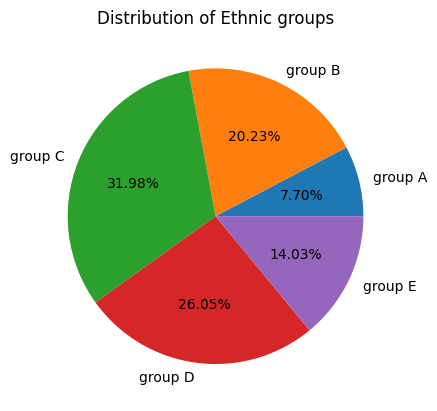

In [70]:
l = ["group A", "group B", "group C", "group D", "group E"]
plt.pie(mtlist, labels=l, autopct= "%1.2f%%")
plt.title("Distribution of Ethnic groups")
plt.show()


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

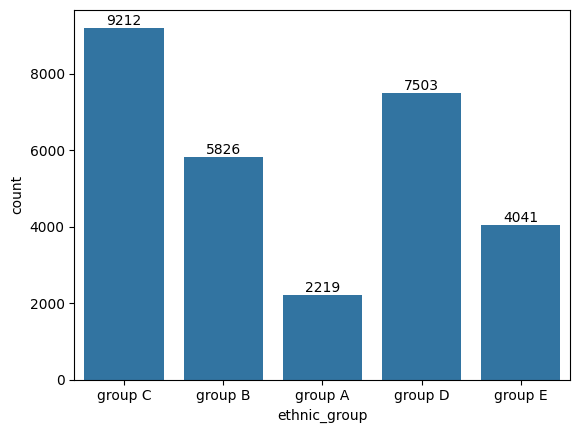

In [74]:
ax = sns.countplot(data=st, x = 'ethnic_group')
ax.bar_label(ax.containers[0])

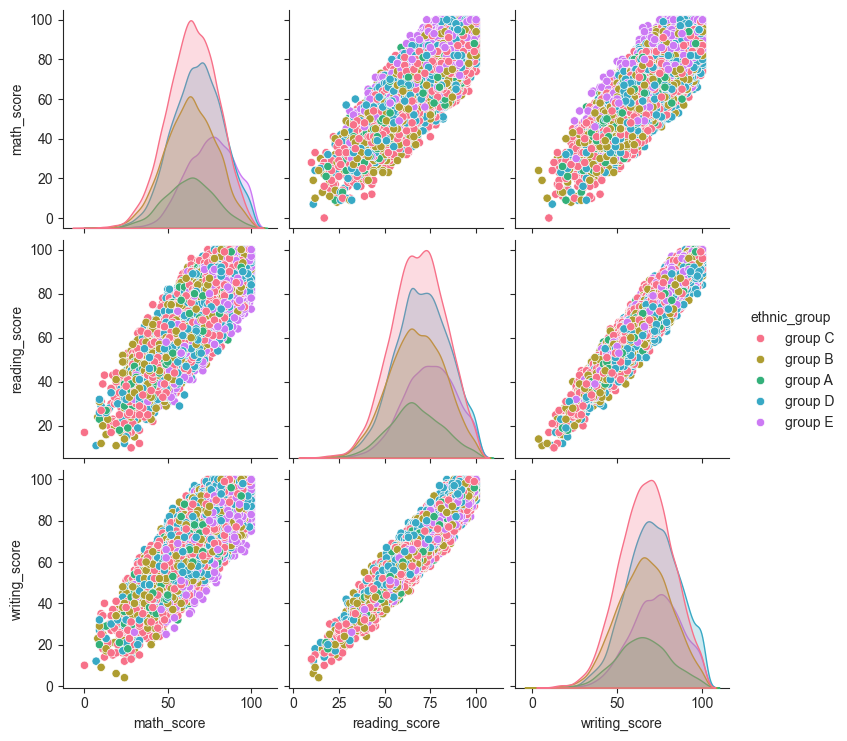

In [152]:
sns.set_style('ticks')
sns.pairplot(sc, hue = 'ethnic_group', diag_kind= 'kde', kind= 'scatter', palette= 'husl')

Group c has the highest percentage distribution in the ethnic groups

# Conclusion 

The student scores on an average mostly effected by the food they are provided, Physical activity they are involved, Time they allocate for studies and the level of there parent education.